In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [10]:
df = pd.read_csv(r"C:\Users\mirza\Desktop\datasets\StudentsPerformance.csv")


In [11]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Shape of the dataset:", df.shape)
df.info()


Shape of the dataset: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.isnull().sum()



gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
df.duplicated().sum()



0

In [15]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Exploratory Data Analysis (EDA)


C:\Users\mirza\AppData\Local\Temp\ipykernel_49196\3366177589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


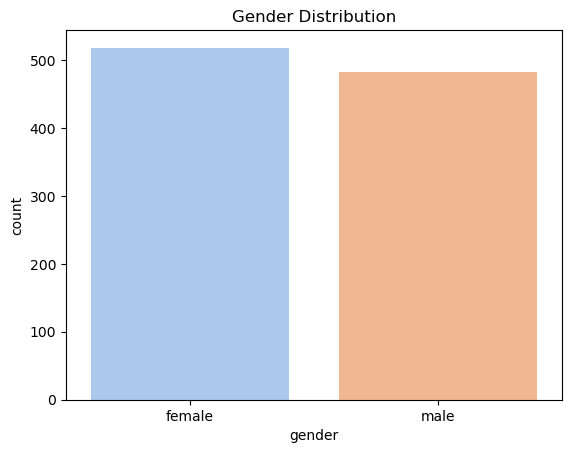

In [17]:
sns.countplot(data=df, x='gender', palette='pastel')
plt.title("Gender Distribution")
plt.show()


C:\Users\mirza\AppData\Local\Temp\ipykernel_49196\3658420169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='parental_level_of_education', palette='Set2')


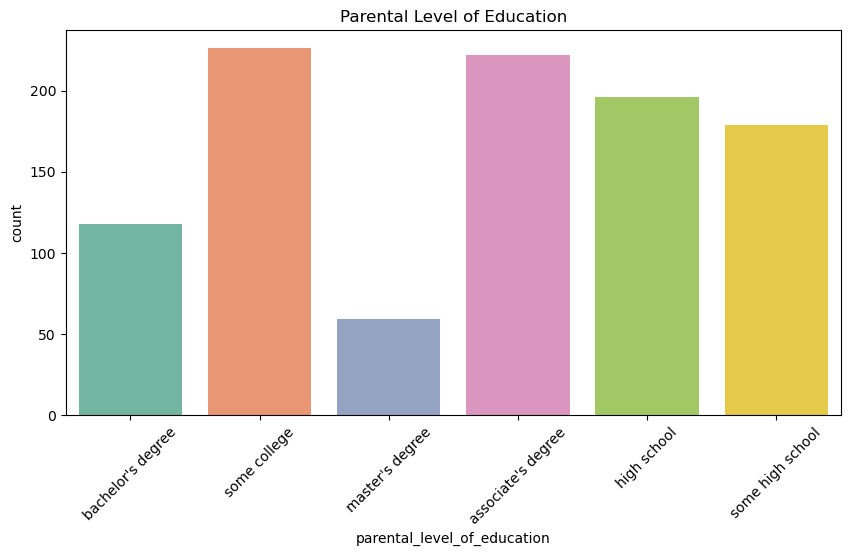

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='parental_level_of_education', palette='Set2')
plt.xticks(rotation=45)
plt.title("Parental Level of Education")
plt.show()



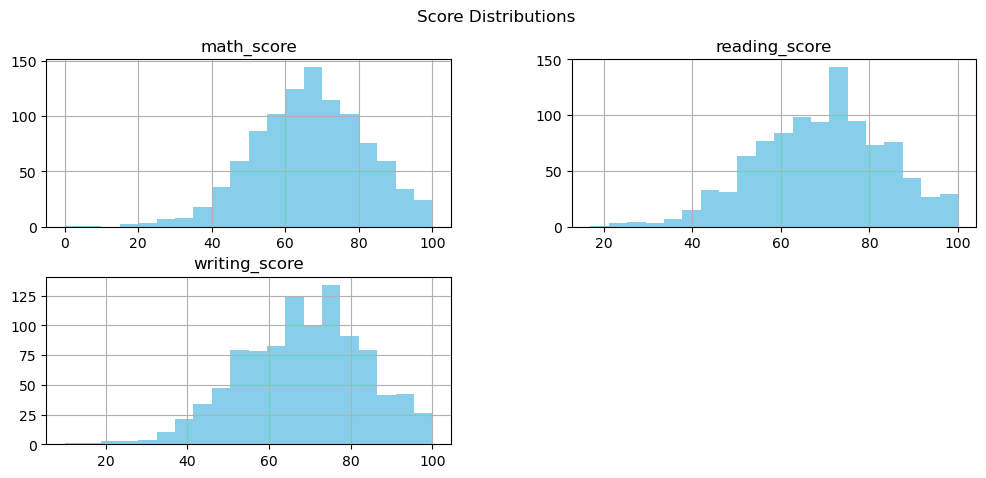

In [20]:
score_columns = ['math_score', 'reading_score', 'writing_score']
df[score_columns].hist(figsize=(12, 5), bins=20, color='skyblue')
plt.suptitle("Score Distributions")
plt.show()


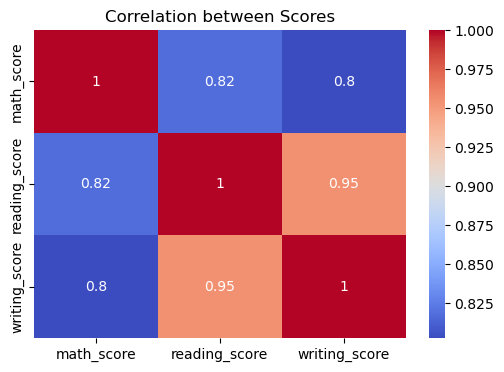

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[score_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Scores")
plt.show()


In [22]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [23]:
df.to_csv("dataset/Updated_StudentsPerformance.csv", index=False)


OSError: Cannot save file into a non-existent directory: 'dataset'

In [24]:
# Example: Save cleaned or modified dataframe
df.to_csv(r"C:\Users\mirza\Desktop\datasets\Cleaned_StudentsPerformance.csv", index=False)


🚀 ML Workflow

In [ ]:
# Let's predict 'average_score' using other features
X = df[['math_score', 'reading_score', 'writing_score']]  
y = df['average_score']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lr.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 1.0
MAE: 2.0037305148434824e-14
RMSE: 2.2195221514831012e-14


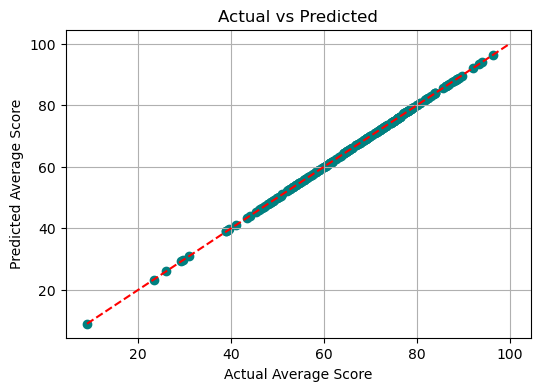

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()


In [30]:
# Example: A new student with 80 in Math, 90 in Reading, 85 in Writing
new_data = pd.DataFrame({'math_score': [80], 'reading_score': [90], 'writing_score': [85]})
predicted_avg = lr.predict(new_data)
print("Predicted average score:", predicted_avg[0])


Predicted average score: 85.0


In [32]:
import joblib

# Save the model to a file
joblib.dump(lr, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [ ]:
# Load the model from the file
loaded_model = joblib.load('linear_regression_model.pkl')

loaded_model.predict([[80, 90, 85]])  # Example input


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.])

In [34]:
import joblib

# Assuming your model is stored in a variable named 'model'
joblib.dump(model, 'linear_regression_model.pkl')


NameError: name 'model' is not defined

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Feature & Target
X = df[['math_score', 'reading_score', 'writing_score']]
y = df['average_score']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 1.0
MAE: 2.0037305148434824e-14
RMSE: 2.2195221514831012e-14


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
import joblib

# Save the model to file
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [37]:
import os

# Create 'dataset' folder if not exists
os.makedirs('dataset', exist_ok=True)

# Save updated dataset with 'average_score' column
df.to_csv('dataset/Updated_StudentsPerformance.csv', index=False)


In [38]:
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [39]:
joblib.dump(model, 'linear_regression_model.pkl')  # Already correct, but...


['linear_regression_model.pkl']

In [40]:
joblib.dump(model, '../linear_regression_model.pkl')


['../linear_regression_model.pkl']

In [41]:
student-performance-analysis-ml/linear_regression_model.pkl


NameError: name 'student' is not defined